In [1]:
import copy
import numpy as np
import random
import matplotlib.pyplot as plt

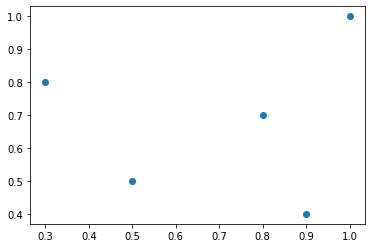

In [10]:
samplePlots = [(0.5, 0.5), 
               (1, 1), 
               (0.8, 0.7), 
               (0.3, 0.8),
               (0.9, 0.4)]
x = [i[0] for i in samplePlots]
y = [i[1] for i in samplePlots]
plt.scatter(x, y)

### 優越関係の判定

In [3]:
def is_dominated(a, b):
    dominated_num = [1 for i, j in zip(a, b) if i < j]
    return True if len(dominated_num) == len(a)  else False 

def is_non_dominated(a, b):
    dominated_num = [1 for i, j in zip(a, b) if i >= j]
    return True if len(dominated_num) > 0  else False


In [4]:
print("========== bがaに優越 =========")
print(is_dominated([1, 1], [2, 2]))
print(is_non_dominated([1, 1], [2, 2]))
print("========== 優越なし =========")
print(is_dominated([1, 2], [1, 2]))
print(is_non_dominated([1, 2], [1, 2]))
print("========== aがbに優越 =========")
print(is_dominated([2, 2], [1, 1]))
print(is_non_dominated([2, 2], [1, 1]))

========== bがaに優越 =========
True
False
========== 優越なし =========
False
True
========== aがbに優越 =========
False
True


### NonDominatedSort

In [5]:
def nonDominatedInd(sample):
    nonDominatedSample = []
    for ind in sample:
        dominated_num = sum([is_dominated(ind, comp) for comp in sample])
        if dominated_num == 0:
            nonDominatedSample.append(ind)
    return nonDominatedSample   

def non_dominated_sort(sample):
    data = copy.deepcopy(sample)
    rank = 1
    while len(data) > 0:
        rankSample = nonDominatedInd(data)
        data = [ind for ind in data if ind not in rankSample]
        print(f'rank {rank}')
        print(rankSample)
        rank+=1
    

In [6]:
non_dominated_sort(samplePlots)

rank 1
[(1, 1)]
rank 2
[(0.8, 0.7), (0.3, 0.8), (0.9, 0.4)]
rank 3
[(0.5, 0.5)]


In [21]:
class NonDominatedSort:
    def is_dominated(self, a, b):
        dominated_num = [1 for i, j in zip(a, b) if i < j]
        return True if len(dominated_num) == len(a)  else False 
    
    def nonDominatedInd(self, sample):
        nonDominatedSample = []
        for ind in sample:
            dominated_num = sum([self.is_dominated(ind, comp) for comp in sample])
            if dominated_num == 0:
                nonDominatedSample.append(ind)
        return nonDominatedSample  

    def non_dominated_sort(self, sample):
        data = copy.deepcopy(sample)
        rank = 1
        while len(data) > 0:
            rankSample = self.nonDominatedInd(data)
            data = [ind for ind in data if ind not in rankSample]
            print(f'rank {rank}')
            print(rankSample)
            rank+=1
    def __call__(self, sample):
        return self.non_dominated_sort(sample)

In [22]:
sort = NonDominatedSort()
sort(samplePlots)

rank 1
[(1, 1)]
rank 2
[(0.8, 0.7), (0.3, 0.8), (0.9, 0.4)]
rank 3
[(0.5, 0.5)]
